<a href="https://colab.research.google.com/github/hgstyler/ML_tutorial/blob/main/Relu_test_08302022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Basic Parts: modules, data, weight, bias**###

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(777)  # for reproducibility
tf.compat.v1.disable_eager_execution() # tf.compat.v1 methods, which is not compatible with eager execution

print(f'TensorFlow: {tf.__version__}')
print(f'Numpy: {np.__version__}')

TensorFlow: 2.8.2
Numpy: 1.21.6


In [2]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)

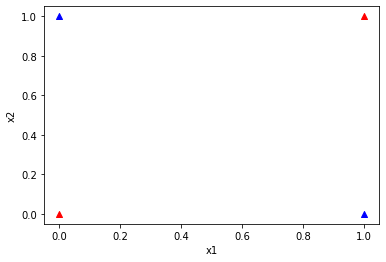

In [3]:
plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [4]:
W1 = tf.Variable(tf.random.uniform([2, 5], -1.0, 1.0), name = 'Weight1')

W2 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight2')
W3 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight3')
W4 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight4')
W5 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight5')
W6 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight6')
W7 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight7')
W8 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight8')
W9 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight9')
W10 = tf.Variable(tf.random.uniform([5, 5], -1.0, 1.0), name = 'Weight10')

W11 = tf.Variable(tf.random.uniform([5, 1], -1.0, 1.0), name = 'Weight11')


b1 = tf.Variable(tf.zeros([5]), name='Bias1')

b2 = tf.Variable(tf.zeros([5]), name='Bias2')
b3 = tf.Variable(tf.zeros([5]), name='Bias3')
b4 = tf.Variable(tf.zeros([5]), name='Bias4')
b5 = tf.Variable(tf.zeros([5]), name='Bias5')
b6 = tf.Variable(tf.zeros([5]), name='Bias6')
b7 = tf.Variable(tf.zeros([5]), name='Bias7')
b8 = tf.Variable(tf.zeros([5]), name='Bias8')
b9 = tf.Variable(tf.zeros([5]), name='Bias9')
b10 = tf.Variable(tf.zeros([5]), name='Bias10')

b11 = tf.Variable(tf.zeros([1]), name='Bias11')

###**Activatation Func.1. sigmoid()**###

In [5]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.sigmoid(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.sigmoid(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.sigmoid(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.sigmoid(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.sigmoid(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.sigmoid(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.sigmoid(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.sigmoid(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.sigmoid(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [6]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [7]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [8]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h1, c1, a1 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h1}\n\nCorrect:\n{c1}\nAccuracy: {a1}')

------------ Training Log ------------
Step: 0, 0.7807995080947876 [array([[ 0.2589939 , -0.09415355, -0.6945498 ,  0.7428427 ,  0.8426082 ],
       [-0.05731293,  0.3501936 ,  0.73681855, -0.5874572 ,  0.26925182]],
      dtype=float32), array([[ 0.868392  ,  0.7429947 ,  0.45941326, -0.1015773 , -0.4748692 ],
       [ 0.87962055, -0.9466594 ,  0.90435547,  0.34115025, -0.8949122 ],
       [-0.77060866, -0.78747207,  0.7046587 ,  0.42026374,  0.5627833 ],
       [ 0.8058398 ,  0.8756291 ,  0.5897097 ,  0.42386505,  0.821641  ],
       [ 0.6652682 ,  0.53686804, -0.7777078 , -0.79430795, -0.8504285 ]],
      dtype=float32), array([[ 0.29236355, -0.7989997 , -0.9171699 , -0.8865694 , -0.21631621],
       [-0.68659365,  0.84280497,  0.39936236, -0.24373744, -0.97490394],
       [ 0.00568666, -0.959339  ,  0.36356482,  0.63113815, -0.5399441 ],
       [ 0.6182107 ,  0.21097362, -0.22788095, -0.23918201, -0.36927038],
       [-0.54293126,  0.80935675, -0.8852053 ,  0.16993348,  0.01658037]

###**Activatation Func.2. ReLU()**###

In [9]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.nn.relu(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.nn.relu(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.nn.relu(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.nn.relu(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.nn.relu(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.nn.relu(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [10]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [11]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [12]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h2, c2, a2 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h2}\n\nCorrect:\n{c2}\nAccuracy: {a2}')

------------ Training Log ------------
Step: 0, 0.6915913224220276 [array([[-0.98329544,  0.9051719 , -0.95317173,  0.21901098,  0.32090694],
       [ 0.65904003,  0.31971332, -0.89895606, -0.09862074,  0.5958722 ]],
      dtype=float32), array([[-0.7544563 ,  0.89158005, -0.87371993, -0.73616314, -0.9855552 ],
       [-0.2475295 , -0.9157919 , -0.1331584 , -0.12041196, -0.32734346],
       [ 0.5606184 , -0.756963  , -0.88880134,  0.4701326 ,  0.6280248 ],
       [ 0.13067842,  0.34467697,  0.7265295 , -0.7318321 , -0.12366533],
       [-0.85183954, -0.1839219 ,  0.75517225,  0.46165353, -0.02266073]],
      dtype=float32), array([[-0.44586658, -0.19396305,  0.67560506,  0.31944776, -0.41716456],
       [ 0.333324  , -0.23389935, -0.4077053 , -0.8932998 , -0.46564293],
       [-0.19563723,  0.99201953,  0.79001445, -0.40704513,  0.90553194],
       [ 0.34802103,  0.5914887 ,  0.77001256, -0.40309286,  0.37148166],
       [ 0.7033224 , -0.5208335 ,  0.9885354 ,  0.4880967 , -0.75095415]

###**Activation Func.3. Leaky ReLU()**###

In [13]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.nn.leaky_relu(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.nn.leaky_relu(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.nn.leaky_relu(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.nn.leaky_relu(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.nn.leaky_relu(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.nn.leaky_relu(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.nn.leaky_relu(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.nn.leaky_relu(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.nn.leaky_relu(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.nn.leaky_relu(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [14]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [15]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [16]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h3, c3, a3 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h3}\n\nCorrect:\n{c3}\nAccuracy: {a3}')

------------ Training Log ------------
Step: 0, 0.6699419617652893 [array([[ 0.61753005, -0.0154704 ,  0.79353696, -0.03919979,  0.32450604],
       [-0.23969465, -0.5859006 , -0.5454042 , -0.05312414, -0.3619574 ]],
      dtype=float32), array([[-8.6113548e-01,  5.5988139e-01, -1.3608852e-01,  7.7268636e-01,
         2.1536726e-01],
       [ 3.4162661e-01, -5.7960671e-01,  4.5246258e-01, -5.7815772e-01,
         3.0680859e-01],
       [ 6.5165526e-01, -9.1096395e-01, -3.9522848e-01, -1.5172654e-02,
         3.6477432e-01],
       [ 4.7744891e-01,  4.3760765e-01,  6.6075933e-01,  6.3249725e-01,
        -4.5356899e-04],
       [-2.1386831e-01,  1.5011511e-02,  4.9416807e-01,  2.4359244e-01,
         7.3147434e-01]], dtype=float32), array([[-0.22980753, -0.3758771 , -0.6256865 ,  0.9371019 , -0.33102477],
       [ 0.9906079 ,  0.955592  ,  0.24925195,  0.65984946, -0.6906047 ],
       [-0.14218925,  0.87859607, -0.38580117,  0.22525817, -0.62354386],
       [-0.7535855 , -0.939987  , -0.

###**Activation Func.4. tanh()**###

In [17]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.nn.tanh(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.nn.tanh(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.nn.tanh(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.nn.tanh(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.nn.tanh(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.nn.tanh(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.nn.tanh(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.nn.tanh(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.nn.tanh(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.nn.tanh(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [18]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [19]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [20]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h4, c4, a4 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h4}\n\nCorrect:\n{c4}\nAccuracy: {a4}')

------------ Training Log ------------
Step: 0, 0.6879335641860962 [array([[-0.19711436,  0.09032737,  0.85590285, -0.12094823,  0.193803  ],
       [ 0.41036567,  0.81975305, -0.34962127,  0.3793893 , -0.64897513]],
      dtype=float32), array([[ 0.93372023, -0.7002227 ,  0.8404016 ,  0.5678553 , -0.06868176],
       [ 0.54758376,  0.6354325 ,  0.4023478 , -0.78124005,  0.51088005],
       [-0.06091804, -0.52144796, -0.19280529, -0.3345584 ,  0.17579624],
       [-0.7047188 ,  0.12826431,  0.330229  , -0.63180834,  0.54154027],
       [-0.95761806,  0.85012454, -0.11148147, -0.80493766,  0.38377362]],
      dtype=float32), array([[ 0.82565194, -0.61562485, -0.96329004,  0.9884495 , -0.0492923 ],
       [-0.19702314,  0.40014926, -0.09682164, -0.73184407, -0.46071824],
       [-0.5788486 ,  0.5679913 , -0.70730543, -0.32028767, -0.04579956],
       [ 0.3761783 ,  0.5069252 , -0.11975434,  0.2356675 ,  0.91583836],
       [ 0.9416891 , -0.09012539,  0.5368714 , -0.15699454,  0.19549175]

###**Activation Func.5.ELU()**###

In [21]:
with tf.name_scope("Layer1_Input") as scope:
  L1 = tf.nn.elu(tf.matmul(X, W1) + b1)

with tf.name_scope("Layer2") as scope:
  L2 = tf.nn.elu(tf.matmul(L1, W2) + b2)
with tf.name_scope("Layer3") as scope:
  L3 = tf.nn.elu(tf.matmul(L2, W3) + b3)
with tf.name_scope("Layer4") as scope:
  L4 = tf.nn.elu(tf.matmul(L3, W4) + b4)
with tf.name_scope("Layer5") as scope:
  L5 = tf.nn.elu(tf.matmul(L4, W5) + b5)
with tf.name_scope("Layer6") as scope:
  L6 = tf.nn.elu(tf.matmul(L5, W6) + b6)
with tf.name_scope("Layer7") as scope:
  L7 = tf.nn.elu(tf.matmul(L6, W7) + b7)
with tf.name_scope("Layer8") as scope:
  L8 = tf.nn.elu(tf.matmul(L7, W8) + b8)
with tf.name_scope("Layer9") as scope:
  L9 = tf.nn.elu(tf.matmul(L8, W9) + b9)
with tf.name_scope("Layer10") as scope:
  L10 = tf.nn.elu(tf.matmul(L9, W10) + b10)

with tf.name_scope("Last_Output") as scope:
  hypothesis = tf.sigmoid(tf.matmul(L10, W11) + b11)

In [22]:
cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
train = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [23]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [24]:
print('------------ Training Log ------------')
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})

        if step % 1000 == 0:
            print(f'Step: {step}, {sess.run(cost, feed_dict={X: x_data, Y: y_data})} {sess.run([W1, W2, W3, W4, W5, W6, W7, W8, W9, W10])}')
    
    print('\n\n------------ Model Evaluation ------------')
    h5, c5, a5 = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print(f'Hypothesis:\n{h5}\n\nCorrect:\n{c5}\nAccuracy: {a5}')

------------ Training Log ------------
Step: 0, 0.7015223503112793 [array([[-0.20135584, -0.6173589 , -0.2247175 , -0.9834979 , -0.83993024],
       [-0.6243705 , -0.98267347,  0.9049873 , -0.95726174, -0.60936236]],
      dtype=float32), array([[ 0.9804789 , -0.8167888 , -0.18043825,  0.07620341, -0.97445536],
       [ 0.85565317,  0.7536591 , -0.00632433,  0.77748317, -0.23790427],
       [ 0.7660857 ,  0.6678646 ,  0.10295646, -0.63877296, -0.61906314],
       [-0.28646135,  0.73417944, -0.6751006 ,  0.6389577 , -0.9460747 ],
       [ 0.7441063 , -0.8971265 ,  0.7018543 , -0.13131508, -0.31980774]],
      dtype=float32), array([[ 0.37722582,  0.37724644, -0.8152979 ,  0.5651386 , -0.22185032],
       [ 0.24589851,  0.4899158 ,  0.6633677 ,  0.4763864 ,  0.1007797 ],
       [-0.73453224,  0.03818428, -0.25846344, -0.97564334, -0.8183213 ],
       [-0.4287276 , -0.5770642 ,  0.46284926,  0.1722746 ,  0.5481937 ],
       [ 0.26141232,  0.40810937,  0.41293195,  0.43232375,  0.69359875]

###**Activation Func.6. Maxout()**###

###**Result Comparison**###

In [25]:
print('--------------- Case 1: sigmoid   ---------------')
print(f'Hypothesis:\n{h1}\n\nCorrect:\n{c1}\nAccuracy: {a1}\n')

print('--------------- Case 2: ReLU  ---------------')
print(f'Hypothesis:\n{h2}\n\nCorrect:\n{c2}\nAccuracy: {a2}\n')

print('--------------- Case 3: Leaky ReLU ---------------')
print(f'Hypothesis:\n{h3}\n\nCorrect:\n{c3}\nAccuracy: {a3}\n')

print('--------------- Case 4: tanh() ---------------')
print(f'Hypothesis:\n{h4}\n\nCorrect:\n{c4}\nAccuracy: {a4}')

print('--------------- Case 5: ELU() ---------------')
print(f'Hypothesis:\n{h5}\n\nCorrect:\n{c5}\nAccuracy: {a5}')

--------------- Case 1: sigmoid   ---------------
Hypothesis:
[[0.5000003 ]
 [0.49999946]
 [0.5000007 ]
 [0.49999985]]

Correct:
[[1.]
 [0.]
 [1.]
 [0.]]
Accuracy: 0.5

--------------- Case 2: ReLU  ---------------
Hypothesis:
[[4.3525398e-03]
 [9.9995893e-01]
 [9.9995893e-01]
 [1.2596668e-06]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0

--------------- Case 3: Leaky ReLU ---------------
Hypothesis:
[[3.1029376e-05]
 [9.9999863e-01]
 [9.9999833e-01]
 [2.9888195e-05]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0

--------------- Case 4: tanh() ---------------
Hypothesis:
[[2.0503998e-04]
 [9.9980247e-01]
 [9.9980211e-01]
 [2.0763278e-04]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0
--------------- Case 5: ELU() ---------------
Hypothesis:
[[4.6844852e-06]
 [9.9997640e-01]
 [9.9998266e-01]
 [1.4513513e-05]]

Correct:
[[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 1.0
